In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# CONSTANTS!!!

# STEP 1 - Load and visualize data

dataInputPath = r'D:\data\Train Segmentation'

imagePathInput = os.path.join(dataInputPath, 'img/')

dataOutputPath = r'D:\data\slice'
imageSliceOutput = os.path.join(dataOutputPath, 'img/')

# STEP 2 - Image normalization
HOUNSFIELD_MIN = -50
HOUNSFIELD_MAX = 450
HOUNSFIELD_RANGE = HOUNSFIELD_MAX-HOUNSFIELD_MIN

# STEP 3 - Slicing and saving
SLICE_X = False
SLICE_Y = False
SLICE_Z = True

SLICE_DECIMATE_IDENTIFIER = 3

In [3]:
# Load image and see max min Hounsfield units
imgPath = os.path.join(imagePathInput,'volume-4.nii')
img = nib.load(imgPath).get_fdata()
# img.uncache()

np.min(img), np.max(img), img.shape, type(img)

(-3024.0, 3071.0, (512, 512, 841), numpy.ndarray)

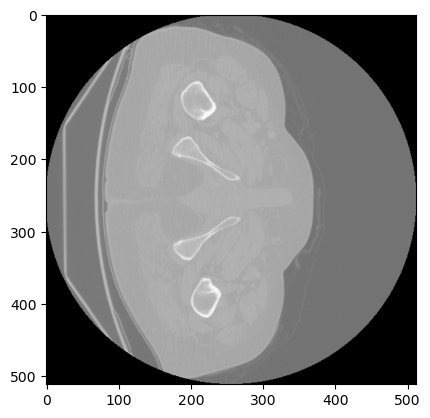

In [4]:
# # Show image slice
imgSlice = img[:,:,60]
plt.imshow(imgSlice, cmap='gray')
plt.show()

In [5]:
def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / (HOUNSFIELD_RANGE + 1e-10)

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)


(0.0, 0.9999999999998, (512, 512, 841), numpy.ndarray)

In [6]:
# Read image volume
def readImageVolume(imgPath, normalize=False):
    img = nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(imgPath, normalize=True)
# readImageVolume(maskPath, normalize=False)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
# def saveSlice(img, fname, path):
#     img = np.uint8(img * 255)
#     fout = os.path.join(path, f'{fname}.png')
#     cv2.imwrite(fout, img)
#     print(f'[+] Slice saved: {fout}', end='\r')

def saveSlice(img, fname, slice_number, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}_slice{str(slice_number).zfill(SLICE_DECIMATE_IDENTIFIER)}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')
    
# saveSlice(nImg[:,:,60], 'test', imageSliceOutput)
# saveSlice(mask[:,:,60], 'test', maskSliceOutput)

Image Min-Max Before Normalization: -50.0, 450.0
Image Min-Max After Normalization: 0.0, 0.9999999999998


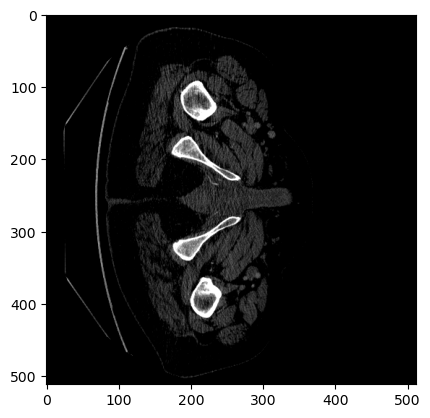

In [9]:
# Debugging
print(f"Image Min-Max Before Normalization: {np.min(img)}, {np.max(img)}")

nImg = normalizeImageIntensityRange(img)

print(f"Image Min-Max After Normalization: {np.min(nImg)}, {np.max(nImg)}")

plt.imshow(nImg[:,:,60], cmap='gray')
plt.show()


# Save
# saveSlice(nImg[:,:,61], 'test_image', imageSliceOutput)
# saveSlice(normalized_mask[:,:,61], 'test_mask', maskSliceOutput)
saveSlice(nImg[:,:,60], 'test_image', 61, imageSliceOutput)

In [37]:
# Slice image in all directions and save
# def sliceAndSaveVolumeImage(vol, fname, path):
#     (dimx, dimy, dimz) = vol.shape
#     print(dimx, dimy, dimz)
#     cnt = 0
       
#     if SLICE_Z:
#         cnt += dimz
#         print('Slicing Z: ')
#         for i in range(dimz):
#             saveSlice(vol[:,:,i], fname, i, path)
#             # saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
#     return cnt

def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname, i, path)
    return cnt

In [16]:
# Read and process image volumes
for filename in sorted(glob.iglob(os.path.join(imagePathInput, '*.nii'))):
    img = readImageVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    
    # Get the base filename without the extension
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    
    # Create a folder with the same name as the file
    output_folder = os.path.join(imageSliceOutput, base_filename)
    os.makedirs(output_folder, exist_ok=True)
    
    numOfSlices = sliceAndSaveVolumeImage(img, base_filename, output_folder)
    
    print(f'\n{filename}, {numOfSlices} slices created in {output_folder}\n')

D:\data\Train Segmentation\img\volume-0.nii (512, 512, 75) 1099 0.0 0.9999999999998
512 512 75
Slicing Z: 
[+] Slice saved: D:\data\slice\img/volume-0\volume-0_slice074.png
D:\data\Train Segmentation\img\volume-0.nii, 75 slices created in D:\data\slice\img/volume-0

D:\data\Train Segmentation\img\volume-1.nii (512, 512, 123) 1147 0.0 0.9999999999998
512 512 123
Slicing Z: 
[+] Slice saved: D:\data\slice\img/volume-1\volume-1_slice122.png
D:\data\Train Segmentation\img\volume-1.nii, 123 slices created in D:\data\slice\img/volume-1

D:\data\Train Segmentation\img\volume-2.nii (512, 512, 517) 1541 0.0 0.9999999999998
512 512 517
Slicing Z: 
[+] Slice saved: D:\data\slice\img/volume-2\volume-2_slice516.png
D:\data\Train Segmentation\img\volume-2.nii, 517 slices created in D:\data\slice\img/volume-2

D:\data\Train Segmentation\img\volume-3.nii (512, 512, 534) 1558 0.0 0.9999999999998
512 512 534
Slicing Z: 
[+] Slice saved: D:\data\slice\img/volume-3\volume-3_slice533.png
D:\data\Train Segm